### 교차검증 실습
### Cross Validation Task

### 약물 A, B, C, X, Y
##### 다중 분류(Multiclass Classification)
- 의학 연구원으로서 동일한 질병을 앓고 있는 일련의 환자에 대한 데이터를 수집했다.
- 치료 과정 동안 각 환자는 5가지 약물, 즉 약물 A, 약물 B, 약물 c, 약물 x 및 y 중 하나에 반응했다.
-  미래에 동일한 질병을 앓는 환자에게 어떤 약물이 적합할 수 있는지 알아보기 위한 모델을 구축한다.

##### feature
- Age: 환자의 나이
- Sex: 환자의 성별
- BP: 혈압
- Cholesterol: 콜레스테롤 수치
- Na_to_K: 나트륨-칼륨

##### target
- Drug: 의약품, 환자에게 효과가 있었던 약

In [1]:
import pandas as pd
drug_df = pd.read_csv('./datasets/drugs.csv')
drug_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [2]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [3]:
drug_df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [4]:
ntk_df = drug_df.loc[:, 'Na_to_K'].reset_index()
ntk_df

,index,Na_to_K
0,0,25.355
1,1,13.093
2,2,10.114
3,3,7.798
4,4,18.043
...,...,...
195,195,11.567
196,196,12.006
197,197,9.894
198,198,14.020


In [5]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_ntk_df = std.fit_transform(ntk_df[['Na_to_K']]) 
ntk_df['Na_to_K'] = std_ntk_df
ntk_df

,index,Na_to_K
0,0,1.286522
1,1,-0.415145
2,2,-0.828558
3,3,-1.149963
4,4,0.271794
...,...,...
195,195,-0.626917
196,196,-0.565995
197,197,-0.859089
198,198,-0.286500


In [6]:
# cond = (ntk_df['Na_to_K'] >= -1.96) & (ntk_df['Na_to_K'] <= 1.96)
# ntk_df[cond]
ntk_df = ntk_df[ntk_df['Na_to_K'].between(-1.96,1.96)]

In [7]:
drug_df = drug_df.iloc[ntk_df.index].reset_index(drop=True)

In [8]:
drug_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
183,56,F,LOW,HIGH,11.567,drugC
184,16,M,LOW,HIGH,12.006,drugC
185,52,M,NORMAL,HIGH,9.894,drugX
186,23,M,NORMAL,NORMAL,14.020,drugX


In [9]:
drug_copy_df = drug_df.copy()

In [10]:
from sklearn.preprocessing import LabelEncoder

drug_encoder = LabelEncoder()
targets = drug_encoder.fit_transform(drug_df['Drug'].tolist())
drug_copy_df['Drug'] = targets

bp_encoder = LabelEncoder()
bps = bp_encoder.fit_transform(drug_df['BP'].tolist())
drug_copy_df['BP'] = bps

chles_encoder = LabelEncoder()
chles = chles_encoder.fit_transform(drug_df['Cholesterol'].tolist())
drug_copy_df['Cholesterol'] = chles

gender_encoder = LabelEncoder()
genders = gender_encoder.fit_transform(drug_df['Sex'].tolist())
drug_copy_df['Sex'] = genders

In [11]:
drug_copy_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
183,56,0,1,0,11.567,2
184,16,1,1,0,12.006,2
185,52,1,2,0,9.894,3
186,23,1,2,1,14.020,3


In [63]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

features, targets = drug_copy_df.iloc[:, :-1], drug_copy_df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(features, targets, test_size=0.2, random_state=125)

dtc = DecisionTreeClassifier()

params = {'max_depth':[3,4,5], 'min_samples_split':[15,16,17]}

In [64]:
features

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
183,56,0,1,0,11.567
184,16,1,1,0,12.006
185,52,1,2,0,9.894
186,23,1,2,1,14.020


In [65]:
targets

0      4
1      2
2      2
3      3
4      4
      ..
183    2
184    2
185    3
186    3
187    3
Name: Drug, Length: 188, dtype: int64

In [66]:
g_dtc = GridSearchCV(dtc, params, cv=5, refit=True, return_train_score=True, n_jobs=-1)

In [67]:
g_dtc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_split': [15, 16, 17]},
             return_train_score=True)

In [68]:
g_dtc.cv_results_

{'mean_fit_time': array([0.00190444, 0.00274525, 0.00240011, 0.00200043, 0.00220003,
        0.00239997, 0.00260472, 0.00220551, 0.00210853]),
 'std_fit_time': array([4.71796487e-04, 4.51387101e-04, 7.99680700e-04, 6.32034003e-04,
        7.48417477e-04, 4.90135332e-04, 5.86405179e-04, 4.04339623e-04,
        7.76355328e-05]),
 'mean_score_time': array([0.00136862, 0.00179863, 0.00180044, 0.00120091, 0.00139971,
        0.00180011, 0.00210633, 0.00120482, 0.0018661 ]),
 'std_score_time': array([0.00033493, 0.00081278, 0.0007476 , 0.00039971, 0.00048992,
        0.00040009, 0.00086388, 0.00040505, 0.00035036]),
 'param_max_depth': masked_array(data=[3, 3, 3, 4, 4, 4, 5, 5, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[15, 16, 17, 15, 16, 17, 15, 16, 17],
              mask=[False, False, False, False, False, False, False, False,

In [69]:
result_df = pd.DataFrame(g_dtc.cv_results_)
result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001904,0.000472,0.001369,0.000335,3,15,"{'max_depth': 3, 'min_samples_split': 15}",0.866667,0.900000,0.833333,...,0.880000,0.026667,7,0.916667,0.908333,0.916667,0.916667,0.916667,0.915,0.003333
1,0.002745,0.000451,0.001799,0.000813,3,16,"{'max_depth': 3, 'min_samples_split': 16}",0.866667,0.900000,0.833333,...,0.880000,0.026667,7,0.916667,0.908333,0.916667,0.916667,0.916667,0.915,0.003333
2,0.002400,0.000800,0.001800,0.000748,3,17,"{'max_depth': 3, 'min_samples_split': 17}",0.866667,0.900000,0.833333,...,0.880000,0.026667,7,0.916667,0.908333,0.916667,0.916667,0.916667,0.915,0.003333
3,0.002000,0.000632,0.001201,0.000400,4,15,"{'max_depth': 4, 'min_samples_split': 15}",1.000000,0.966667,0.966667,...,0.986667,0.016330,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,0.000000
4,0.002200,0.000748,0.001400,0.000490,4,16,"{'max_depth': 4, 'min_samples_split': 16}",1.000000,0.966667,0.966667,...,0.986667,0.016330,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,0.000000
5,0.002400,0.000490,0.001800,0.000400,4,17,"{'max_depth': 4, 'min_samples_split': 17}",1.000000,0.966667,0.966667,...,0.986667,0.016330,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,0.000000
6,0.002605,0.000586,0.002106,0.000864,5,15,"{'max_depth': 5, 'min_samples_split': 15}",1.000000,0.966667,0.966667,...,0.986667,0.016330,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,0.000000
7,0.002206,0.000404,0.001205,0.000405,5,16,"{'max_depth': 5, 'min_samples_split': 16}",1.000000,0.966667,0.966667,...,0.986667,0.016330,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,0.000000
8,0.002109,0.000078,0.001866,0.000350,5,17,"{'max_depth': 5, 'min_samples_split': 17}",1.000000,0.966667,0.966667,...,0.986667,0.016330,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,0.000000


In [70]:
print(g_dtc.best_params_,g_dtc.best_score_, sep='\n')

{'max_depth': 4, 'min_samples_split': 15}
0.9866666666666667


In [71]:
dtc = g_dtc.best_estimator_

prediction = dtc.predict(X_test)
accuracy_score(y_test, prediction)

1.0

In [72]:
from sklearn.tree import export_graphviz

export_graphviz(
    dtc, 
    out_file='./images/drug_g_dtc01.dot', 
    class_names=drug_encoder.classes_, 
    feature_names=features.columns, 
    impurity=True, 
    filled=True
)

In [73]:
import graphviz

with open('./images/drug_g_dtc01.dot') as f:
    drug_g_dtc01 = f.read()

drug_g_dtc01_graph = graphviz.Source(drug_g_dtc01)

In [74]:
drug_g_dtc01_graph.render(filename='drug_g_dtc01', directory='./images', format='png')

'images\\drug_g_dtc01.png'

<img src="./images/drug_g_dtc01.png">

In [75]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

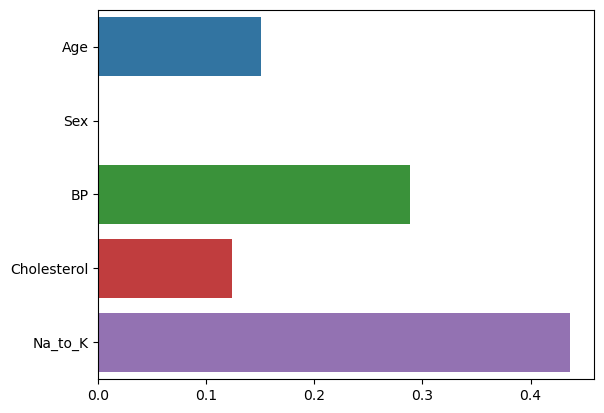

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

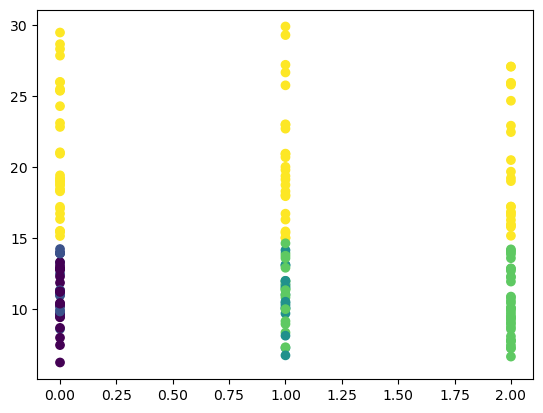

In [77]:
plt.scatter(features.iloc[:, 2], features.iloc[:, -1], c=targets)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


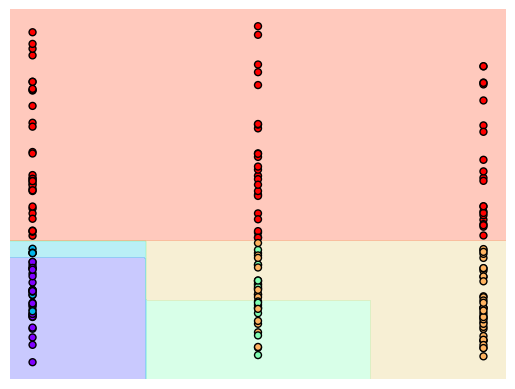

In [78]:
features_grph = features.iloc[:, [2, -1]]
visualize_boundary(dtc, features_grph, targets)

In [79]:
from sklearn.model_selection import StratifiedKFold
s_kfold = StratifiedKFold(n_splits=5)
count=0
accuracy_list=[]
targets = pd.DataFrame(targets)
for train_index, test_index in s_kfold.split(features, targets):
    # 분리
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    
    y_train, y_test  = targets.iloc[train_index],targets.iloc[test_index]

    # 학습 및 예측
    dtc.fit(X_train, y_train)
    prediction = dtc.predict(X_test)

    # 평가
    accuracy = np.round(accuracy_score(y_test, prediction),4)
    accuracy_list.append(accuracy)
    
    # 검증
    train_targets = pd.DataFrame(y_train)
    test_targets = pd.DataFrame(y_test)
    
    count += 1

    print(f'회차:{count}\n')
    print(f'학습 타겟 데이터 분포 : \n {train_targets.value_counts()}\n')
    print(f'검증 타겟 데이터 분포 : \n {test_targets.value_counts()}\n')
    print(f'정확도 : {accuracy}\n')
    
print(f'평군 정확도: {np.mean(accuracy_list)}')

회차:1

학습 타겟 데이터 분포 : 
 Drug
4       63
3       43
0       18
1       13
2       13
Name: count, dtype: int64

검증 타겟 데이터 분포 : 
 Drug
4       16
3       11
0        5
1        3
2        3
Name: count, dtype: int64

정확도 : 1.0

회차:2

학습 타겟 데이터 분포 : 
 Drug
4       63
3       43
0       18
1       13
2       13
Name: count, dtype: int64

검증 타겟 데이터 분포 : 
 Drug
4       16
3       11
0        5
1        3
2        3
Name: count, dtype: int64

정확도 : 1.0

회차:3

학습 타겟 데이터 분포 : 
 Drug
4       63
3       43
0       19
2       13
1       12
Name: count, dtype: int64

검증 타겟 데이터 분포 : 
 Drug
4       16
3       11
0        4
1        4
2        3
Name: count, dtype: int64

정확도 : 1.0

회차:4

학습 타겟 데이터 분포 : 
 Drug
4       63
3       43
0       19
1       13
2       13
Name: count, dtype: int64

검증 타겟 데이터 분포 : 
 Drug
4       16
3       11
0        4
1        3
2        3
Name: count, dtype: int64

정확도 : 0.9459

회차:5

학습 타겟 데이터 분포 : 
 Drug
4       64
3       44
0       18
1       13
2       12
Name: count, d